In [1]:

# Importamos las librerías necesarias

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

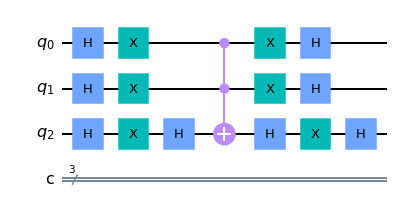

In [2]:
#Implementing the grover gate
Grover = QuantumCircuit(3,3)
Grover.h(range(3))
Grover.x(range(3))

Grover.h(2)
Grover.mct([0,1],2)
Grover.h(2)

Grover.x(range(3))
Grover.h(range(3))

Grover.draw(output="mpl")

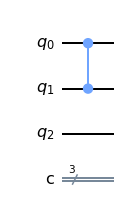

In [28]:
#Implementing the oracle
Oracle=QuantumCircuit(3,3)
Oracle.cz(1,0)#first control, second target qubit
Oracle.draw(output="mpl")


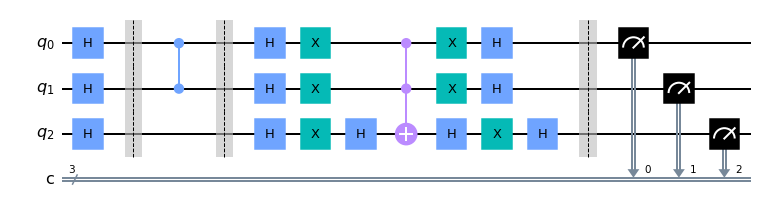

In [29]:
circ=QuantumCircuit(3,3)
circ.h(range(3))
circ.barrier(range(3))
circ=circ+Oracle
circ.barrier(range(3))
circ=circ+Grover
circ.barrier(range(3))
circ.measure(range(3), range(3))
circ.draw(output="mpl")

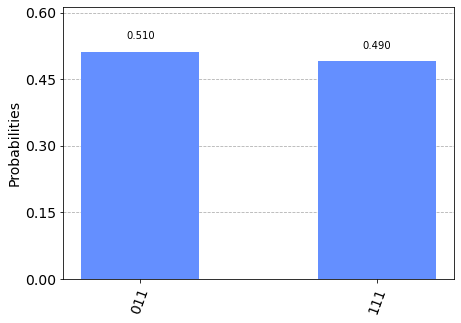

In [31]:
backend=Aer.get_backend("qasm_simulator")
job=execute(circ,backend,shots=1000)
result=job.result()
counts=result.get_counts()
plot_histogram(counts)
#print(counts)

In [69]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    qc.barrier(range(nqubits))
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    #qc.barrier(range(nqubits))
    # We will return the diffuser as a gate
    
    #U_s = qc.to_gate()
    #U_s.name = "Grover"
    #or as a circuit: qc
    return qc
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc
def oracle(nqubits):
    qc = QuantumCircuit(nqubits)
    qc.barrier(range(nqubits))
    qc.cz(0, 2)
    qc.cz(1, 2)
    #oracle_circ = qc.to_gate()
    #oracle_circ.name = "Oracle"
    return qc

{'10101': 122, '10110': 135, '11101': 132, '11110': 134, '00101': 117, '00110': 130, '01101': 111, '01110': 119}


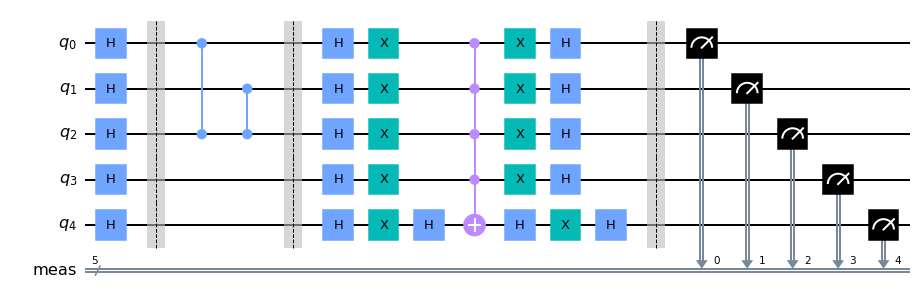

In [78]:
n = 5
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, list(range(n)))
grover_circuit=grover_circuit+oracle(n)
grover_circuit=grover_circuit+diffuser(n)
#grover_circuit.append(diffuser(n), list(range(n)))
grover_circuit.measure_all()

backend_grover=Aer.get_backend("qasm_simulator")
job_grover=execute(grover_circuit,backend_grover,shots=1000)
result=job_grover.result()
counts=result.get_counts()
print(counts)
plot_histogram(counts)
grover_circuit.draw(output="mpl")

In [ ]:
Grover = QuantumCircuit(3,3)
#Grover.h(range(3))
#Grover.x(range(3))

#Grover.h(2)
#Grover.mct([0,1],2)
Grover.h(2)

#Grover.x(range(3))
#Grover.h(range(3))


Grover.measure(range(3), range(3))
Grover.draw(output="mpl")
backend=Aer.get_backend("qasm_simulator")
job=execute(Grover,backend,shots=1000)
result=job.result()
counts=result.get_counts()
plot_histogram(counts)